<a href="https://colab.research.google.com/github/FajarKKP/CodingPractice/blob/main/IMDb_subwords_1D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.1


In [3]:
pip install -U keras keras-applications

Requirement already up-to-date: keras in /usr/local/lib/python3.7/dist-packages (2.4.3)
     |████████████████████████████████| 51kB 1.7MB/s 


In [4]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [5]:
tokenizer = info.features['text'].encoder

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [7]:
#Make the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [9]:
Num_epochs = 10
history = model.fit(train_dataset, epochs=Num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 249s 633ms/step - loss: 0.5866 - accuracy: 0.6521 - val_loss: 0.3487 - val_accuracy: 0.8599
Epoch 2/10
391/391 [==============================] - 245s 625ms/step - loss: 0.2253 - accuracy: 0.9164 - val_loss: 0.3026 - val_accuracy: 0.8778
Epoch 3/10
391/391 [==============================] - 245s 626ms/step - loss: 0.1593 - accuracy: 0.9429 - val_loss: 0.3154 - val_accuracy: 0.8750
Epoch 4/10
391/391 [==============================] - 249s 637ms/step - loss: 0.1270 - accuracy: 0.9564 - val_loss: 0.3535 - val_accuracy: 0.8704
Epoch 5/10
391/391 [==============================] - 248s 633ms/step - loss: 0.0978 - accuracy: 0.9693 - val_loss: 0.4326 - val_accuracy: 0.8652
Epoch 6/10
391/391 [==============================] - 245s 627ms/step - loss: 0.0776 - accuracy: 0.9777 - val_loss: 0.5225 - val_accuracy: 0.8610
Epoch 7/10
391/391 [==============================] - 246s 630ms/step - loss: 0.0598 - accuracy: 0.9816 - val_loss: 0.5844 -

In [10]:
#Plot the model
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_' +string])
  plt.show()

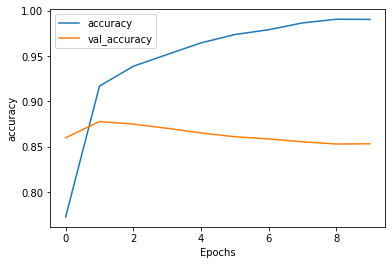

In [11]:
plot_graphs(history, 'accuracy')

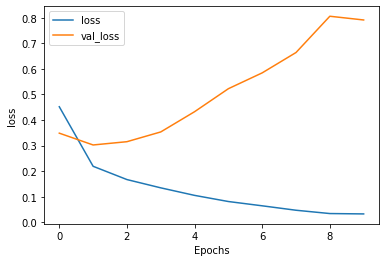

In [12]:
plot_graphs(history, 'loss')